<a href="https://colab.research.google.com/github/JunaidLamture/PRODIGY_INFOTECH/blob/main/PRODIGY_ML_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DATASET**



In [16]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(50)

# Number of data points
num_samples = 1000

# Generate random values for square footage, bedrooms, and bathrooms
square_footage = np.random.randint(800, 3500, size=num_samples)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.uniform(1, 4, size=num_samples)

# Generate prices based on the equation: price = 100 * square_footage + 20000 * bedrooms + 15000 * bathrooms + random_noise
random_noise = np.random.normal(0, 20000, size=num_samples)  # Random noise with normal distribution
prices = 100 * square_footage + 20000 * bedrooms + 15000 * bathrooms + random_noise

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Square Footage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': prices
})

# Save the dataset to a CSV file
data.to_csv('house_prices_dataset.csv', index=False)

# Display the first few rows of the dataset
print(data.head())


   Square Footage  Bedrooms  Bathrooms          Price
0            2512         5   3.726527  379228.830923
1            2304         4   3.960231  375825.624512
2            2731         1   1.475730  331611.942137
3            2957         1   1.370252  335859.874365
4            2814         4   2.830631  403397.055595


### **LINEAR REGRESSION**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
# Load the dataset
data = pd.read_csv('house_prices_dataset.csv')


In [19]:
data

,Square Footage,Bedrooms,Bathrooms,Price
0,2512,5,3.726527,379228.830923
1,2304,4,3.960231,375825.624512
2,2731,1,1.475730,331611.942137
3,2957,1,1.370252,335859.874365
4,2814,4,2.830631,403397.055595
...,...,...,...,...
995,2399,5,1.100347,309824.247354
996,1329,3,3.433318,257333.818696
997,2511,4,3.728818,407102.482548
998,2445,5,3.718583,395582.353943


In [20]:
# Separate features and target variable
X = data[['Square Footage', 'Bedrooms', 'Bathrooms']]
y = data['Price']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 361780312.14820623


In [25]:
example_house = [[1800, 3, 2]]
predicted_price = model.predict(example_house)
print("Predicted Price:", predicted_price[0])

Predicted Price: 270849.8258684943


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

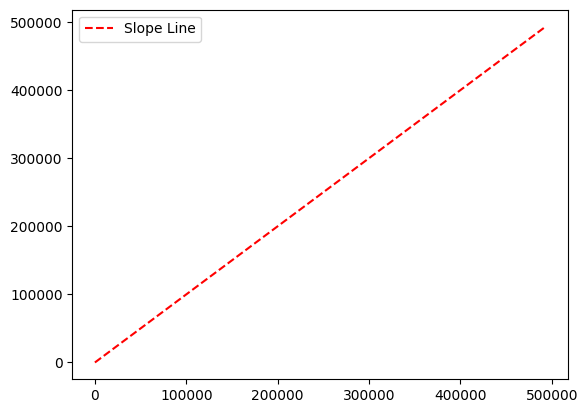

In [27]:
# Plot the slope line
max_price = max(y_test.max(), y_pred.max())
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--')  # Slope line
plt.legend(['Slope Line', 'Predictions'])
plt.show()

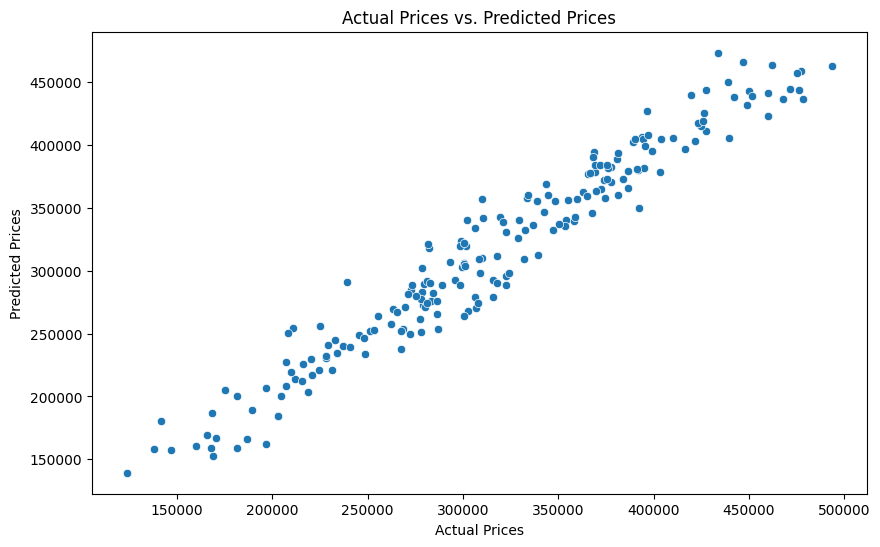

In [28]:
# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()